$\dfrac{\partial}{\partial x} \left( \dfrac{\partial c^2 U}{\partial x} \right) = \dfrac{\partial^2 U}{\partial t^2}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [14]:

def vibrating_string(L, N, c, dt, T, psi):
    # Initialization
    dx = L / N
    # psi = np.zeros(N+1)         # Wave function at current step
    psi_new = np.zeros(N+1)     # Wave function at next step
    psi_old = np.zeros(N+1)     # Wave function at previous step

    # Initial condition
    # psi[int(np.floor(N / 2))] = init_cond

    # First time step (using a different scheme, e.g., forward difference)
    for i in range(1, N):
        psi_new[i] = psi[i] + 0.5 * (c*dt/dx)**2 * (psi[i+1] - 2*psi[i] + psi[i-1])

    # Time evolution
    time_steps = int(T / dt)
    for _ in range(1, time_steps):
        psi_old, psi = psi, psi_new  # Update time steps
        for i in range(1, N):
            psi_new[i] = c**2 * ((dt**2)/(dx**2)) * (psi[i+1] + psi[i-1] - 2*psi[i]) - psi_old[i] + 2*psi[i]
            # 2*psi[i] - psi_old[i] + (c*dt/dx)**2 * (psi[i+1] - 2*psi[i] + psi[i-1])

        # Apply boundary conditions
        psi_new[0], psi_new[N] = 0, 0  # Fixed ends

    return psi_new


In [11]:
# Simulation parameters
L = 1.0      # Length of the string
N = 100      # Number of intervals (N+1 points)
c = 1.0      # Wave speed
dt = 0.001   # Time step
T = 50

## ADD Taylor??


In [15]:
xs = np.linspace(0, L, N+1)  # Position array

def timestepping(xs):
    i = np.sin(2*np.pi*xs)
    ii = np.sin(5*np.pi*xs)
    iii = []
    for x in xs:
        if x > 1/5 and x < 2/5:
            iii.append(np.sin(5*np.pi*x))
        else: 
            iii.append(0)

    psis = [i, ii, iii]
    return psis

psis = timestepping(xs)
for psi in psis:
    for t in np.arange(0, T, 10):
        psi_new = vibrating_string(L, N, c, dt, t, psi)

        # Plot the final state
        plt.plot(xs, psi_new, label=f'State at  ($\Psi(x, {np.round(t, 2)})$)')
    plt.xlabel('Position ($x$)')
    plt.ylabel('Wave function ($\Psi$)')
    plt.title('1D Wave Equation')
    plt.legend(fontsize = 8)
    plt.show()

<>:22: SyntaxWarning: invalid escape sequence '\P'
<>:24: SyntaxWarning: invalid escape sequence '\P'
<>:22: SyntaxWarning: invalid escape sequence '\P'
<>:24: SyntaxWarning: invalid escape sequence '\P'
C:\Users\sacha\AppData\Local\Temp\ipykernel_27296\2770861365.py:22: SyntaxWarning: invalid escape sequence '\P'
  plt.plot(xs, psi_new, label=f'State at  ($\Psi(x, {np.round(t, 2)})$)')
C:\Users\sacha\AppData\Local\Temp\ipykernel_27296\2770861365.py:24: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel('Wave function ($\Psi$)')
C:\Users\sacha\AppData\Local\Temp\ipykernel_27296\2770861365.py:22: SyntaxWarning: invalid escape sequence '\P'
  plt.plot(xs, psi_new, label=f'State at  ($\Psi(x, {np.round(t, 2)})$)')
C:\Users\sacha\AppData\Local\Temp\ipykernel_27296\2770861365.py:24: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel('Wave function ($\Psi$)')


IndexError: invalid index to scalar variable.

In [5]:
# Simulation parameters
L = 1.0      # Length of the string
N = 100      # Number of intervals (N+1 points)
c = 1.0      # Wave speed
dt = 0.001   # Time step
T = 50

<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
C:\Users\sacha\AppData\Local\Temp\ipykernel_27296\3917034989.py:4: SyntaxWarning: invalid escape sequence '\P'
  ax.set(xlabel='Position ($x$)', ylabel='Wave function ($\Psi$)', title='1D Wave Equation')
C:\Users\sacha\AppData\Local\Temp\ipykernel_27296\3917034989.py:9: SyntaxWarning: invalid escape sequence '\P'
  line, = ax.plot(xs, psi, label=f'Initial state $\Psi_(x, 0)$')


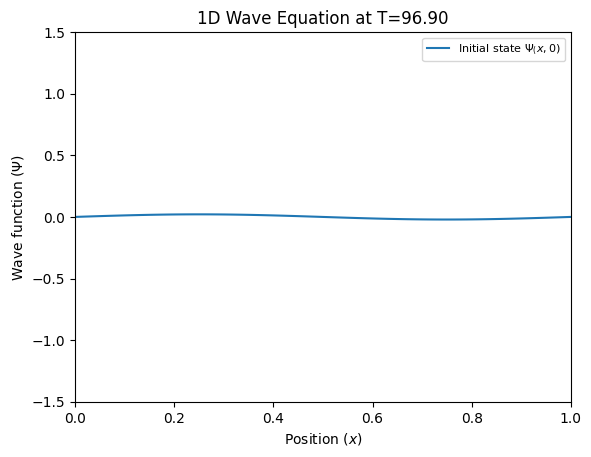

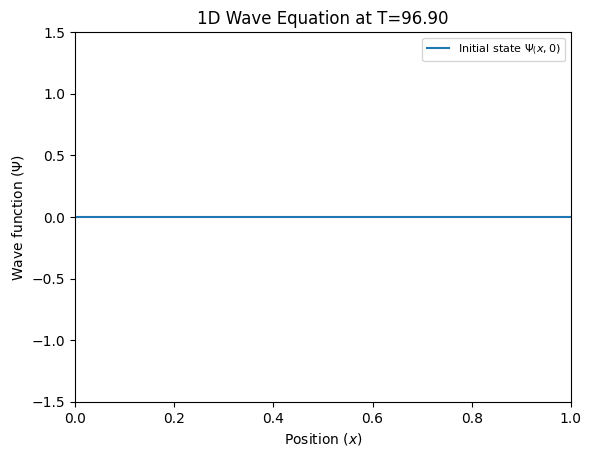

C:\Users\sacha\AppData\Local\Temp\ipykernel_27296\3917034989.py:4: SyntaxWarning: invalid escape sequence '\P'
  ax.set(xlabel='Position ($x$)', ylabel='Wave function ($\Psi$)', title='1D Wave Equation')
C:\Users\sacha\AppData\Local\Temp\ipykernel_27296\3917034989.py:9: SyntaxWarning: invalid escape sequence '\P'
  line, = ax.plot(xs, psi, label=f'Initial state $\Psi_(x, 0)$')


KeyboardInterrupt: 

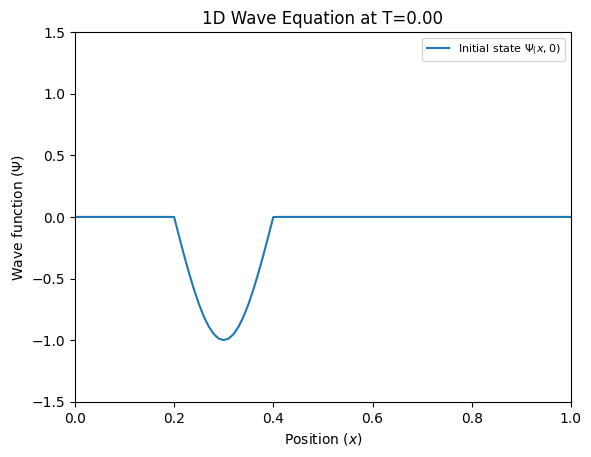

In [9]:

# Prepare the figure
def ani(xs, L, N, c, dt, T, psi, idx):
    fig, ax = plt.subplots()
    ax.set(xlabel='Position ($x$)', ylabel='Wave function ($\Psi$)', title='1D Wave Equation')

    ax.set_xlim(0, L)
    ax.set_ylim(-1.5, 1.5)

    line, = ax.plot(xs, psi, label=f'Initial state $\Psi_(x, 0)$')
    ax.legend(fontsize=8)

    # Animation function
    def animate(T):
        psi_new = vibrating_string(L, N, c, dt, T, psi)
        line.set_ydata(psi_new)
        ax.set_title(f'1D Wave Equation at T={T:.2f}')

    # Create animation
    ani = FuncAnimation(fig, animate, frames=np.arange(0, 100.1, 5.1), interval=100)
    ani.save(f'animation{idx}.gif', writer=PillowWriter(fps=2))
    plt.show()

xs = np.linspace(0, L, N+1)  # Position array
psis = timestepping(xs)
for idx, psi in enumerate(psis):
    ani(xs, L, N, c, dt, T, psi, idx)

# 1.2


# D


# E

In [ ]:
import os

# Parameters
D = 1.0  # Diffusion constant
L = 1.0  # Length of the domain in both x and y directions
N = 100  # Number of intervals in each direction, hence N+1 grid points
dx = L / N
dt = (dx**2) / (4 * D)  # Time step, chosen based on stability criterion
total_time = 1.0
iterations = int((total_time / dt) / 40)
print(iterations)
save_every = 100  # Save data every 100 iterations

# Initialize concentration field
c = np.zeros((N+1, N+1))

# Apply initial condition
# Assuming initial condition is already satisfied by zeros
# Apply boundary conditions
c[:, 0] = 0  # Bottom boundary
c[:, N] = 1  # Top boundary

# Simulation directory
sim_dir = "simulation_data"
if not os.path.exists(sim_dir):
    os.makedirs(sim_dir)

for k in range(iterations):
    # Copy current state to avoid overwriting
    c_new = np.copy(c)
    
    # Update concentration field
    for i in range(1, N):  # Exclude boundaries
        for j in range(1, N):  # Exclude boundaries
            c_new[i, j] = c[i, j] + dt * D / dx**2 * (
                c[i+1, j] + c[i-1, j] + c[i, j+1] + c[i, j-1] - 4*c[i, j]
            )
    
    # Apply periodic boundary conditions
    c_new[0, :] = c_new[N-1, :]
    c_new[N, :] = c_new[1, :]
    
    c = np.copy(c_new)
    
    # Save data to file every 100 iterations
    if k % save_every == 0:
        filename = os.path.join(sim_dir, f"concentration_at_iteration_{k}.csv")
        np.savetxt(filename, c, delimiter=",")
        print(f"Data saved to {filename} at iteration {k}")

# Optionally, plot the final state
plt.imshow(c, extent=[0, L, 0, L], origin='lower', cmap='hot')
plt.colorbar(label='Concentration')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Concentration at Final State')
plt.show()


1000
Data saved to simulation_data\concentration_at_iteration_0.csv at iteration 0
Data saved to simulation_data\concentration_at_iteration_100.csv at iteration 100
Data saved to simulation_data\concentration_at_iteration_200.csv at iteration 200
Data saved to simulation_data\concentration_at_iteration_300.csv at iteration 300
Data saved to simulation_data\concentration_at_iteration_400.csv at iteration 400


KeyboardInterrupt: 